# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Segundo Trabalho Entregável 05/12/2023

## Prof. Luis Gustavo Nonato  

ICMC-USP

----

## <font color='blue'> Instruções para o Trabalho Entregável 2</font>
<font color='blue'> Os seguintes passos devem ser seguidos para realizar e entregar do segundo trabalho:

1. Baixe e renomeie o notebook `SME241_trabalho_2.ipynb` com seu nome e número USP
2. Uma vez que tenha concluído o trablaho, faça upload do notebook (renomeado) no diretório `Entrega dos Trabalhos/Trabalho 2`

Em todas as questões abaixo você precisa marcar a alternariva correta e também incluir o código Python que calcula a resposta da questão. Para marcar a alternativa que julgue correta, inclua um sinal (X) na frente da mesma. Por exemplo:

a) 123<br>
b) 234 (X)<br>
c) 345<br>
d) 456

</font>

<font color='red'> Não esqueça de renomear o arquivo com seu nome e número USP antes de fazer upload no Drive. <br><br>Por exemplo: <br><br> **Gustavo_Nonato_3223813.ipynb** <br><br> Insira também seu nome e número USP na célula abaixo.</font>

---

**Nome**: Gabriel Gomes Tavares

**No USP**: 15111742

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna uma série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [19]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)

#### 1.1) (0.5 ponto) 
Faça o gráfico do número de partículas utilizando como discretização no eixo $x$ pontos igualmente espaçados no intervalo $[0,2\pi]$.

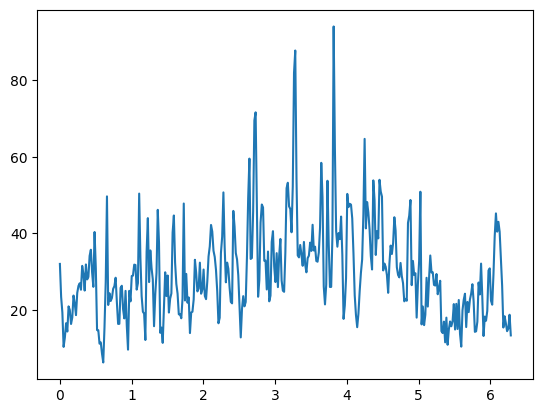

In [20]:
 # Solução
x = np.linspace(0, 2*np.pi, read_particulas().size)
y = read_particulas()

plt.plot(x,y)

#### 1.2) (3 pontos)
Considere a função 

$$
f(t)=a_0+a_1\cos(t)+a_2\sin(t)+a_3\cos(2t)+a_4\sin(2t)
$$

como modelo para a distribuição das partículas dadas no exercício anterior. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo a minimizar $\sum_i\|f(t_i)-Q(t_i)\|$, onde $Q(t_i)$ é o número de partículas no ponto $t_i\in [0,2\pi]$. 

Qual o erro médio quadrático da aproximação gerada?

a) 300.1<br>
b) 200.9<br>
c) 110.6(x)<br>
d) 90.6

In [21]:
# Dados fornecidos
t = np.linspace(0, 2*np.pi, len(read_particulas()))
particulas = read_particulas()

# Matriz do sistema
A = np.column_stack([np.ones_like(t), np.cos(t), np.sin(t), np.cos(2*t), np.sin(2*t)])

# Solução usando mínimos quadrados
coeficientes, _, _, _ = np.linalg.lstsq(A, particulas, rcond=None)

# Valores otimizados para os parâmetros
a0, a1, a2, a3, a4 = coeficientes

# Aproximação da função
funcao = a0 + a1 * np.cos(t) + a2 * np.sin(t) + a3 * np.cos(2*t) + a4 * np.sin(2*t)

# Erro médio quadrático da aproximação
erro = np.mean((funcao - particulas)**2)

# Imprimir os valores otimizados e o erro médio quadrático
print(f'a0: {a0}')
print(f'a1: {a1}')
print(f'a2: {a2}')
print(f'a3: {a3}')
print(f'a4: {a4}')
print(f'Erro Médio Quadrático: {erro}')

a0: 29.85174778297243
a1: -8.488519767561836
a2: -2.3992082585541583
a3: 0.817808081179944
a4: 2.7524633644760583
Erro Médio Quadrático: 110.63609500425942


#### 1.3) (1.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

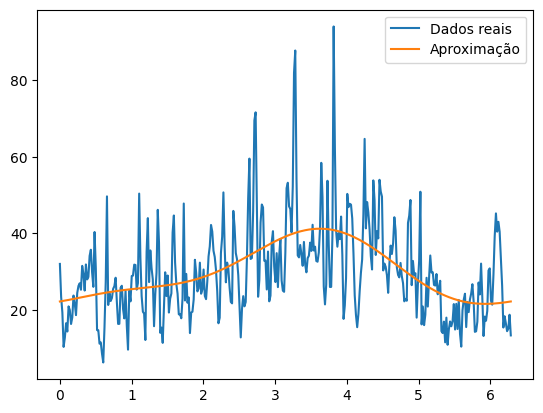

In [22]:
# Solução

# Plotar os dados e a aproximação
plt.plot(t, particulas, label='Dados reais')
plt.plot(t, funcao, label='Aproximação')
plt.legend()
plt.show()


### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$. 

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

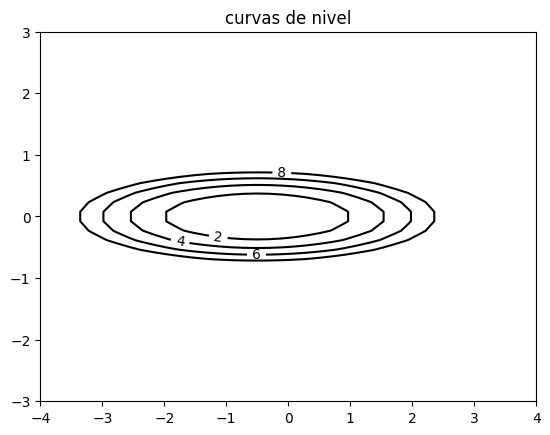

In [23]:
# Solução

xx, yy = np.meshgrid(np.linspace(-4,4,40), np.linspace(-3,3,40))
zz = xx**2+16*yy**2+xx

_, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz, colors='k', levels=[2, 4, 6, 8])
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('curvas de nivel')

plt.show()

#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53] (X)<br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

In [24]:
#Solução com base no exemplo do material

def calcular_jacobiana(xyl):
    x, y, l = xyl
    jacobiana = np.array([[2, -l, -y],
                          [-l, 32, -x],
                          [y, x, 0]])
    return jacobiana

def metodo_newton(xyl_0):
    max_iteracoes = 100
    iteracoes = np.zeros((3, max_iteracoes))
    iteracoes[:, 0] = xyl_0
    residuos = np.zeros(3)

    for i in range(1, max_iteracoes):
        h1 = 2 * iteracoes[0, i - 1] + 1 - iteracoes[2, i - 1] * iteracoes[1, i - 1]
        h2 = 32 * iteracoes[1, i - 1] - iteracoes[2, i - 1] * iteracoes[0, i - 1]
        h3 = iteracoes[0, i - 1] * iteracoes[1, i - 1] - 1
        residuos[:] = [h1, h2, h3]

        jacobiana = calcular_jacobiana(iteracoes[:, i - 1])
        delta_xyl = np.linalg.solve(jacobiana, - residuos)

        iteracoes[:, i] = iteracoes[:, i - 1] + delta_xyl

    return iteracoes

#chute com base no que foi pedido
chute_inicial = [2, 1, 1]
resultado = metodo_newton(chute_inicial)

if np.all(np.abs(resultado[:, -1] - resultado[:, -2]) < 1e-7):
    print('A solução é:', resultado[0:2, -1])
else:
    print('A solução não convergiu!')


A solução é: [1.88579892 0.53027923]


#### 2.3) (1.5 ponto)
Faça o gráfico da curva curva $xy=1$ e da curva de nível de $f(x,y)$ que é tangente a ela calculada no exercício anterior, destacando o ponto de tangência. O valor da curva de nível é:

a) 7.38 <br>
b) 8.10 <br>
c) 9.94 (X)<br>
d) 10.51

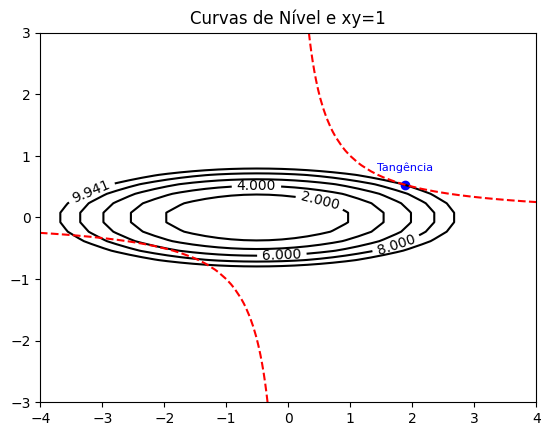

9.94117347498345


In [25]:
#Solução
xx, yy = np.meshgrid(np.linspace(-4, 4, 40), np.linspace(-3, 3, 40))

#função xy = 1
zz_xy = xx*yy-1  # Calcula os valores de z para xy = 1

#função do já feita anteriormente
zz = xx**2 + 16 * yy**2 + xx

#ponto tangente
pontoTan = [1.88579892, 0.53027923]

level_tan = pontoTan[0]**2 + 16 * pontoTan[1]**2 + pontoTan[0]

_, ax = plt.subplots()
CS1 = ax.contour(xx, yy, zz, colors='k', levels=[2, 4, 6, 8, level_tan]) #Mostrar a função f(x,y)=x^2+16y^2+x
CS2 = ax.contour(xx, yy, zz_xy, colors='r', levels=[0], linestyles='dashed')  # Mostrar a função xy = 1
ax.clabel(CS1, inline=1, fontsize=10)
ax.set_title('Curvas de Nível e xy=1')

ax.scatter(*pontoTan, color='blue', label='Ponto de Tangência')
ax.annotate('Tangência', pontoTan, textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

plt.show()
print(level_tan)